# ORIE 4741 Final Report

## Packages:

In [1]:
import Pkg
Pkg.add("CSV")
Pkg.add("Plots")
Pkg.add("DataFrames")
Pkg.add("Statistics")
Pkg.add("Pandas")

   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [2]:
using Random
Random.seed!(13)

using CSV
using Plots
using DataFrames
using Statistics
using Pandas

In [66]:
import Pkg; Pkg.add("StatPlots")
Pkg; Pkg.add("RDatasets")
using StatPlots, RDatasets 
pyplot()

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


Plots.PyPlotBackend()

In [4]:
using Dates

In [5]:
Pkg.add("GLM")
using GLM

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


## Load Data:

In [1188]:
df = CSV.read("ViceNews_FullOISData - Sheet1.csv")

thread = 1 warning: only found 15 / 16 columns on data row: 4400. Filling remaining columns with `missing`


,Date,NumberOfSubjects,Fatal,SubjectArmed,SubjectRace,SubjectGender
,String,Int64,String,String,String,String
1,3/4/2010,1,N,N,L,U
2,1/9/2010,1,F,Y,W,M
3,6/10/2010,1,F,Y,W,M
4,11/10/2010,1,N,Y,U,M
5,11/11/2010,1,N,Y,L,M
6,11/11/2010,1,N,N,L,F
7,6/4/2011,1,F,Y,L,M
8,9/7/2011,1,N,Y,U,M
9,2/9/2011,1,F,Y,W,M


### Changing Date Format:

In [1189]:
df[:Month] = df[:Date]
df[:Year] = df[:Date]
df[:Date1] = df[:Date]

4400-element CSV.Column{String,String}:
 "3/4/2010"
 "1/9/2010"
 "6/10/2010"
 "11/10/2010"
 "11/11/2010"
 "11/11/2010"
 "6/4/2011"
 "9/7/2011"
 "2/9/2011"
 "5/10/2011"
 "4/12/2011"
 "1/4/2012"
 "8/6/2012"
 ⋮
 "4/24/2013"
 "5/18/2013"
 "5/21/2014"
 "5/28/2011"
 "6/15/2011"
 "6/19/2015"
 "6/27/2011"
 "6/28/2012"
 "7/26/2015"
 "7/28/2016"
 "8/30/2015"
 "9/15/2012"

In [1190]:
df.formattedSubjectAge = df.SubjectAge
allowmissing!(df)
for i in 1:length(df[:Month])
    s = df.Month[i]   
    if length(s) != 4        
        d = split(s, "/")        
    if length(d) == 3          
               
            df.Month[i] = d[1]       
    end        
    if length(d) == 2            

        df.Month[i] = d[2]        
    end    
      
    end
end

#println(df.Date)

for i in 1:length(df[:Month])
    s = df.Month[i]
    if length(s) > 2
        df.Month[i] = missing
    end
end

println(df.Month)

Union{Missing, String}["3", "1", "6", "11", "11", "11", "6", "9", "2", "5", "4", "1", "8", "12", "9", "3", "7", "12", "11", "5", "1", "1", "6", "1", "2", "1", "1", "1", "1", "1", "10", "10", "10", "10", "10", "11", "12", "12", "12", "3", "3", "3", "3", "3", "3", "4", "4", "4", "5", "5", "5", "5", "5", "6", "6", "6", "6", "7", "7", "7", "7", "7", "8", "8", "8", "9", "9", missing, "9", "4", "8", "9", "11", "4", "9", "9", "5", "7", "9", "7", "7", "5", "5", "4", "10", "8", "8", "1", "10", "10", "10", "11", "12", "2", "4", "4", "4", "5", "5", "5", "6", "6", "6", "6", "6", "6", "7", "8", "8", "9", "10", "11", "11", "12", "5", "2", "4", "3", "5", "11", "9", "7", "7", "2", "7", "4", "9", "9", "4", "4", "2", "1", "1", "1", "10", "10", "10", "11", "12", "12", "3", "3", "4", "4", "4", "5", "5", "5", "5", "5", "7", "8", "8", "9", "9", "9", "2", "2", "6", "7", "9", "9", "12", "12", "7", "8", "8", "5", "6", "7", "8", "8", "8", "8", "8", "10", "12", "1", "3", "6", "7", "6", "9", "11", "12", "2", "5",

", "8", "8", "8", "8", "8", "8", "9", "9", "9", "9", "9", "9", "9", "9", "9", "9", "9", "9", "9", "9", "9", "9", "9", "9", "9", "9", "9", "9", "9", "9", "9", "6", "11", "9", "10", "12", "10", "12", "8", "4", "8", "11", "1", "1", "5", "3", "7", "1", "8", "11", "2", "1", "10", "4", "8", "1", "12", "3", "4", "12", "8", "4", "4", "1", "3", "8", "12", "1", "1", "1", "10", "10", "10", "10", "10", "10", "11", "11", "11", "11", "12", "12", "2", "2", "3", "3", "3", "3", "4", "4", "4", "4", "4", "5", "5", "6", "6", "6", "6", "7", "7", "7", "7", "8", "8", "8", "8", "9", "9", "9", "11", "11", "01", "06", "01", "04", "05", "12", "02", "03", "07", "07", "01", "05", "04", "07", "04", "12", "03", "05", "09", "02", "01", "09", "03", "01", "01", "01", "02", "02", "03", "03", "03", "03", "03", "03", "03", "03", "03", "03", "03", "04", "04", "04", "04", "05", "05", "05", "05", "05", "05", "05", "06", "06", "08", "08", "10", "10", "10", "10", "11", "11", "12", "12", "12", "12", "2", "11", "6", "10", "11", 

, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, "4", "2", "2", "2", "2", "5", "6", "10", "4", "6", "4", "12", "1", "6", "6", "10", "10", "10", "6", "12", "6", "12", "1", "1", "7", "7", "4", "1", "9", "1", "2", "2", "11", "11", "5", "7", "11", "12", "6", "9", "2", "3", "1", "1", "6", "10", "5", "9", "7", "10", "6", "8", "7", "10", "3", "5", "12", "3", "3", "3", "8", "9", "9", "5", "9", "11", "1", "1", "4", "8", "12", "2", "11", "1", "2", "4", "5", "3", "4", "9", "7", "7", "7", "5", "5", "11", "8", "2", "2", "9", "9", "3", "9", "1", "11", "6", "2", "6", "6", "3", "3", "3", "3", "6", "1", "5", "2", "11", "5", "5", "9", "1", "11", "9", "4", "9", "1", "1",

In [1191]:
df.formattedSubjectAge = df.SubjectAge
allowmissing!(df)

for i in 1:length(df[:Year])
    s = df.Year[i]   
    if length(s) != 4        
        d = split(s, "/")        
    if length(d) == 3          
               
            df.Year[i] = d[3]       
    end        
    if length(d) == 2            
  
        df.Year[i] = d[1]        
    end    
    else       
       
           
        df.Year[i] = d[1]    
    end
end

#println(df.Date)

for i in 1:length(df[:Year])
    s = df.Year[i]
    if length(s) != 4
        df.Year[i] = missing
    end
end

println(df.Year)

Union{Missing, String}["2010", "2010", "2010", "2010", "2010", "2010", "2011", "2011", "2011", "2011", "2011", "2012", "2012", "2013", "2013", "2013", "2013", "2013", "2013", "2014", "2014", "2015", "2015", "2015", "2016", "2016", "2010", "2015", "2011", "2010", "2010", "2016", "2013", "2013", "2010", "2013", "2014", "2012", "2015", "2014", "2012", "2013", "2012", "2014", "2010", "2010", "2012", "2014", "2014", "2016", "2015", "2015", "2016", "2010", "2016", "2012", "2011", "2014", "2010", "2010", "2013", "2015", "2010", "2013", "2011", "2010", "2015", missing, "2011", "2011", "2011", "2012", "2012", "2013", "2013", "2013", "2014", "2014", "2014", "2014", "2015", "2015", "2015", "2015", "2015", "2015", "2015", "2014", "2013", "2014", "2011", "2011", "2012", "2010", "2010", "2012", "2015", "2013", "2012", "2014", "2014", "2013", "2014", "2010", "2012", "2011", "2012", "2015", "2014", "2013", "2010", "2010", "2011", "2011", "2011", "2012", "2012", "2013", "2013", "2013", "2014", "2015", 

 "2013", "2013", "2013", "2013", "2014", "2014", "2014", "2014", "2014", "2014", "2014", "2015", "2015", "2015", "2015", "2015", "2015", "2015", "2016", "2016", "2016", "2016", "2016", "2016", "2016", "2016", "2016", "2016", "2012", "2015", "2010", "2012", "2010", "2012", "2012", "2012", "2010", "2016", "2016", "2016", "2011", "2011", "2015", "2015", "2013", "2016", "2013", "2011", "2012", "2015", "2013", "2012", "2013", "2013", "2015", "2015", "2013", "2012", "2013", "2013", "2013", "2014", "2015", "2015", "2015", "2011", "2014", "2015", "2014", "2011", "2013", "2013", "2015", "2011", "2013", "2013", "2015", "2014", "2014", "2016", "2011", "2015", "2012", "2016", "2012", "2012", "2012", "2012", "2013", "2016", "2011", "2011", "2012", "2011", "2011", "2012", "2016", "2011", "2012", "2011", "2016", "2010", "2010", "2010", "2010", "2010", "2010", "2011", "2011", "2011", "2011", "2011", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2013", "2013", "2013", "2013", "2013",

", "2013", "2013", "2013", "2014", "2014", "2014", "2014", "2015", "2015", "2015", "2015", "2015", "2015", "2015", "2016", "2016", "2016", "2016", "2016", "2016", "2013", "2014", "2011", "2013", "2014", "2016", "2016", "2010", "2012", "2013", "2016", "2011", "2011", "2016", "2016", "2013", "2012", "2010", "2015", "2010", "2011", "2010", "2015", "2010", "2013", "2010", "2011", "2012", "2013", "2015", "2015", "2014", "2016", "2012", "2014", "2010", "2014", "2011", "2011", "2010", "2012", "2013", "2013", "2015", "2016", "2012", "2014", "2015", "2012", "2010", "2010", "2010", "2010", "2010", "2010", "2010", "2010", "2010", "2010", "2010", "2010", "2010", "2010", "2010", "2011", "2011", "2011", "2011", "2011", "2011", "2011", "2011", "2011", "2011", "2011", "2011", "2011", "2011", "2011", "2011", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2013

 missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, missing, "2010", "2010", "2010", "2010", "2010", "2011", "2011", "2011", "2011", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2013", "2013", "2013", "2014", "2014", "2014", "2015", "2015", "2015", "2015", "2015", "2012", "2012", "20

, "2013", "2015", "2013", "2012", "2015", "2010", "2010", "2012", "2012", "2010", "2012", "2010", "2010", "2012", "2012", "2013", "2013", "2013", "2013", "2014", "2014", "2014", "2014", "2014", "2013", "2011", "2010", "2012", "2013", "2014", "2014", "2016", "2013", "2010", "2011", "2011", "2015", "2014", "2014", "2014", "2014", "2010", "2010", "2014", "2012", "2015", "2015", "2010", "2010", "2010", "2010", "2010", "2010", "2010", "2010", "2010", "2011", "2011", "2011", "2011", "2011", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2012", "2013", "2013", "2013", "2013", "2013", "2013", "2013", "2013", "2014", "2014", "2014", "2014", "2014", "2015", "2016", "2016", "2016", "2016", "2016", "2016", "2016", "2016", "2016", "2012", "2016", "2013", "2015", "2011", "2010", "2016", "2012", "2012", "2012", "2012", "2011", "2011", "2011", "2012", "2013", "2011", "2012", "2012", "2012", "2010", "2012", "2016", "2013"

In [1192]:
df[:Date]

4400-element Array{Union{Missing, String},1}:
 "3/4/2010"
 "1/9/2010"
 "6/10/2010"
 "11/10/2010"
 "11/11/2010"
 "11/11/2010"
 "6/4/2011"
 "9/7/2011"
 "2/9/2011"
 "5/10/2011"
 "4/12/2011"
 "1/4/2012"
 "8/6/2012"
 ⋮
 "4/24/2013"
 "5/18/2013"
 "5/21/2014"
 "5/28/2011"
 "6/15/2011"
 "6/19/2015"
 "6/27/2011"
 "6/28/2012"
 "7/26/2015"
 "7/28/2016"
 "8/30/2015"
 "9/15/2012"

In [1193]:
df[:Month]

4400-element Array{Union{Missing, String},1}:
 "3"
 "1"
 "6"
 "11"
 "11"
 "11"
 "6"
 "9"
 "2"
 "5"
 "4"
 "1"
 "8"
 ⋮
 "4"
 "5"
 "5"
 "5"
 "6"
 "6"
 "6"
 "6"
 "7"
 "7"
 "8"
 "9"

In [1194]:
df[:Year]

4400-element Array{Union{Missing, String},1}:
 "2010"
 "2010"
 "2010"
 "2010"
 "2010"
 "2010"
 "2011"
 "2011"
 "2011"
 "2011"
 "2011"
 "2012"
 "2012"
 ⋮
 "2013"
 "2013"
 "2014"
 "2011"
 "2011"
 "2015"
 "2011"
 "2012"
 "2015"
 "2016"
 "2015"
 "2012"

In [1195]:
for i in 1:length(df[:Month])
    df.Date1[i] = string(df.Year[i], "/" , df.Month[i])
end

In [1196]:
df[:Date1]

4400-element Array{Union{Missing, String},1}:
 "2010/3"
 "2010/1"
 "2010/6"
 "2010/11"
 "2010/11"
 "2010/11"
 "2011/6"
 "2011/9"
 "2011/2"
 "2011/5"
 "2011/4"
 "2012/1"
 "2012/8"
 ⋮
 "2013/4"
 "2013/5"
 "2014/5"
 "2011/5"
 "2011/6"
 "2015/6"
 "2011/6"
 "2012/6"
 "2015/7"
 "2016/7"
 "2015/8"
 "2012/9"

### Changing Race Format:

In [1197]:
#Subject Race
for i in 1:4400
    if isequal(df.SubjectRace[i], "W") == true
        df.SubjectRace[i] = "White"
        
    elseif isequal(df.SubjectRace[i], "B") == true
        df.SubjectRace[i] = "Black"
            
    elseif isequal(df.SubjectRace[i], "A") == true
        df.SubjectRace[i] = "Asian"
    
    elseif isequal(df.SubjectRace[i], "L") == true
        df.SubjectRace[i] = "Latino"
    
    else
        df.SubjectRace[i] = "Other"
            
    end
    
end

df.SubjectRace

4400-element Array{Union{Missing, String},1}:
 "Latino"
 "White"
 "White"
 "Other"
 "Latino"
 "Latino"
 "Latino"
 "Other"
 "White"
 "Latino"
 "Latino"
 "White"
 "Latino"
 ⋮
 "Latino"
 "Latino"
 "White"
 "Latino"
 "Latino"
 "White"
 "Latino"
 "Black"
 "White"
 "Latino"
 "Latino"
 "Latino"

### Changing Age Format:

In [1198]:
df.SubjectAge

4400-element Array{Union{Missing, String},1}:
 "U"
 "U"
 "U"
 "U"
 "U"
 "U"
 "U"
 "U"
 "U"
 "U"
 "U"
 "U"
 "U"
 ⋮
 "33"
 "22"
 "28"
 "26"
 "43"
 "30"
 "30"
 "19"
 "23"
 "31"
 "40"
 "23"

In [1199]:
for i in 1:4400
    if isequal(df.SubjectAge[i], "0-19") == true
        df.SubjectAge[i] = "10"
    end
    if isequal(df.SubjectAge[i], "40-49") == true
        df.SubjectAge[i] = "45"
    end
    if isequal(df.SubjectAge[i], "30-39") == true
        df.SubjectAge[i] = "35"
    end
    if isequal(df.SubjectAge[i], "12") == true
        df.SubjectAge[i] = "12"
    end
    if isequal(df.SubjectAge[i], "juvenile") == true
        df.SubjectAge[i] = "15"
    end
    if isequal(df.SubjectAge[i], "20-29") == true
        df.SubjectAge[i] = "25"
    end
    if isequal(df.SubjectAge[i], "4") == true
        df.SubjectAge[i] = "4"
    end
    if isequal(df.SubjectAge[i], "50-59") == true
        df.SubjectAge[i] = "55"
    end
end

df.SubjectAge

4400-element Array{Union{Missing, String},1}:
 "U"
 "U"
 "U"
 "U"
 "U"
 "U"
 "U"
 "U"
 "U"
 "U"
 "U"
 "U"
 "U"
 ⋮
 "33"
 "22"
 "28"
 "26"
 "43"
 "30"
 "30"
 "19"
 "23"
 "31"
 "40"
 "23"

### Changing Number of Shots Format:

In [1202]:
df.NumberOfShots

4400-element Array{Union{Missing, String},1}:
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 ⋮
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"

In [1203]:
for i in 1:4400
    if isequal(df.NumberOfShots[i], "Multiple") == true
        df.NumberOfShots[i] = "5"
    end
    if isequal(df.NumberOfShots[i], "73 total") == true
        df.NumberOfShots[i] = "73"
    end
    if isequal(df.NumberOfShots[i], "1;3") == true
        df.NumberOfShots[i] = "4"
    end
    if isequal(df.NumberOfShots[i], ">4") == true
        df.NumberOfShots[i] = "7"
    end
    if isequal(df.NumberOfShots[i], "5") == true
        df.NumberOfShots[i] = "5"
    end
    if isequal(df.NumberOfShots[i], " 8") == true
        df.NumberOfShots[i] = "8"
    end
    if isequal(df.NumberOfShots[i], ">/=20") == true
        df.NumberOfShots[i] = "22"
    end
    if isequal(df.NumberOfShots[i], "5;5;3") == true
        df.NumberOfShots[i] = "13"
    end
    if isequal(df.NumberOfShots[i], "no information") == true
        df.NumberOfShots[i] = "NA"
    end
    if isequal(df.NumberOfShots[i], "5;8;6") == true
        df.NumberOfShots[i] = "19"
    end
    if isequal(df.NumberOfShots[i], "0;2;0") == true
        df.NumberOfShots[i] = "2"
    end
    if isequal(df.NumberOfShots[i], ">/=5") == true
        df.NumberOfShots[i] = "8"
    end
    if isequal(df.NumberOfShots[i], "5;1") == true
        df.NumberOfShots[i] = "6"
    end
    if isequal(df.NumberOfShots[i], "13;4") == true
        df.NumberOfShots[i] = "17"
    end
    if isequal(df.NumberOfShots[i], "9;7;4;7;2;7;3") == true
        df.NumberOfShots[i] = "39"
    end
    if isequal(df.NumberOfShots[i], "16;16;2;12") == true
        df.NumberOfShots[i] = "46"
    end
    if isequal(df.NumberOfShots[i], ">1") == true
        df.NumberOfShots[i] = "4"
    end
    if isequal(df.NumberOfShots[i], "Unknown") == true
        df.NumberOfShots[i] = "NA"
    end
    if isequal(df.NumberOfShots[i], ">13") == true
        df.NumberOfShots[i] = "16"
    end
    if isequal(df.NumberOfShots[i], "3;8;8") == true
        df.NumberOfShots[i] = "19"
    end
    if isequal(df.NumberOfShots[i], ">/=12") == true
        df.NumberOfShots[i] = "13"
    end
    if isequal(df.NumberOfShots[i], ">1") == true
        df.NumberOfShots[i] = "4"
    end
    if isequal(df.NumberOfShots[i], "10;3;2;2") == true
        df.NumberOfShots[i] = "17"
    end
    if isequal(df.NumberOfShots[i], "not clear") == true
        df.NumberOfShots[i] = "NA"
    end
    if isequal(df.NumberOfShots[i], "10;3;2;2") == true
        df.NumberOfShots[i] = "17"
    end
    if isequal(df.NumberOfShots[i], ">/=12") == true
        df.NumberOfShots[i] = "13"
    end
    if isequal(df.NumberOfShots[i], "9;5;4") == true
        df.NumberOfShots[i] = "18"
    end
    if isequal(df.NumberOfShots[i], "5;8;6") == true
        df.NumberOfShots[i] = "19"
    end
    if isequal(df.NumberOfShots[i], "16;9;12") == true
        df.NumberOfShots[i] = "37"
    end
    if isequal(df.NumberOfShots[i], ">3") == true
        df.NumberOfShots[i] = "6"
    end
    if isequal(df.NumberOfShots[i], ">4") == true
        df.NumberOfShots[i] = "7"
    end
    if isequal(df.NumberOfShots[i], ">2") == true
        df.NumberOfShots[i] = "5"
    end
    if isequal(df.NumberOfShots[i], "U") == true
        df.NumberOfShots[i] = "NA"
    end
    if isequal(df.NumberOfShots[i], "1*") == true
        df.NumberOfShots[i] = "2"
    end
    if isequal(df.NumberOfShots[i], "3-5") == true
        df.NumberOfShots[i] = "4"
    end
end

df.NumberOfShots

4400-element Array{Union{Missing, String},1}:
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 ⋮
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"

### Changing Number of Fatal:

In [1282]:
q = []
c = [1]
b = [-1]

for i in 1:4400
    if isequal(df.Fatal[i], "F") == true
        q = vcat(q, c)
    else
        q = vcat(q, b)
    end
end

df[:Fatal1] = convert(Array{Float64}, q)

4400-element Array{Float64,1}:
 -1.0
  1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
  1.0
 -1.0
 -1.0
  1.0
  1.0
 -1.0
  ⋮
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0

### Data Summary

In [1330]:
feature_names = names(df)
for i in 1:19
    println(string(i), "\t", string(feature_names[i]), "\t\t\t", string(eltype(df[!, i])))
end

1	Date			Union{Missing, String}
2	NumberOfSubjects			Union{Missing, Int64}
3	Fatal			Union{Missing, String}
4	SubjectRace			Union{Missing, String}
5	SubjectAge			Union{Missing, String}
6	NumberOfShots			Union{Missing, String}
7	Month			Union{Missing, String}
8	Year			Union{Missing, String}
9	Date1			Union{Missing, String}
10	formattedSubjectAge			Union{Missing, String}
11	Fatal1			Float64


LoadError: BoundsError: attempt to access 11-element Array{Symbol,1} at index [12]

In [1329]:
#deletecols!(df,x)

,Date,NumberOfSubjects,Fatal,SubjectRace,SubjectAge,NumberOfShots
,String⍰,Int64⍰,String⍰,String⍰,String⍰,String⍰
1,10/7/2012,1,N,Other,U,NA
2,12/17/2014,1,F,Latino,48,NA
3,05/04/2013,1,F,Black,38,NA
4,2010,1,N,Other,U,NA
5,2011,1,N,Other,U,NA
6,7/28/2016,1,F,Latino,U,NA
7,10/9/2011,1,N,Latino,U,21
8,1/5/2013,1,F,White,40,10
9,02/10/2011,1,N,Black,U,3


## Descriptive Statistics of the Data:

In [1205]:
println(df.SubjectAge)

Union{Missing, String}["U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "16", "26", "34", "26", "30", "34", "35", "70", "55", "30", "24", "25", "35", "27", "63", "25", "U", "U", "U", "U", "17", "51", "61", "22", "26", "44", "24", "49", "35", "32", "22", "34", "18", "29", "54", "26", "30", "31", "U", "U", "32", "21", "46", "34", "26", "42", "U", "U", "26", "34", "44", "40", "19", "27", "48", "35", "31", "40", "57", "49", "U", "U", "U", "U", "U", "44", "29", "38", "22", "40", "19", "42", "19", "2

"U", "U", "U", "23", "U", "U", "U", "U", "U", "U", "27", "34", "U", "U", "U", "U", "U", "U", "36", "33", "U", "U", "U", "22", "U", "U", "26", "38", "26", "63", "33", "22", "56", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "20", "19", "22", "U", "U", "U", "35", "34", "U", "U", "26", "47", "U", "U", "20", "49", "38", "37", "21", "36", "69", "U", "26", "26", "U", "U", "U", "23", "23", "U", "U", "U", "24", "40", "21", "U", "U", "U", "27", "55", "34", "22", "20", "25", "U", "U", "U", "21", "29", "37", "21", "18", "U", "22", "29", "19", "U", "U", "U", "U", "U", "U", "20", "20", "32", "43", "U", "U", "24", "U", "41", "U", "26", "23", "32", "U", "U", "N/A", "34", "32", "U", "U", "32", "U", "U", "U", "51", "69", "U", "U", "U", "U", "41", "U", "U", "U", "U", "U", "54", "46", "U", "U", "31", "26", "U", "U", "U", "U", "U", "U", "33", "34", "21", "38", "17", "U", "28", "44", "N/A", "U", "28", "U", "24", "U", "U", "30", "42", "29", "29", "28", "18", "U", "U", "U", "U", "42", "37", "22", "49", 

 "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U", "U",

In [857]:
#df.formattedSubjectAge = ""
allowmissing!(df)
println(typeof(df.formattedSubjectAge))
s=df.SubjectAge[340]
print(s)
d = split(s, "-")
print(d)
d = parse.(Int64, d)
print(d)

Array{Union{Missing, String},1}
20-29SubString{String}["20", "29"][20, 29]

In [858]:

feature_names = names(df)
for i in 1:17
    println(string(i), "\t", string(feature_names[i]), "\t\t\t", string(eltype(df[!, i])))
end

1	Date			Union{Missing, String}
2	NumberOfSubjects			Union{Missing, Int64}
3	Fatal			Union{Missing, String}
4	SubjectArmed			Union{Missing, String}
5	SubjectRace			Union{Missing, String}
6	SubjectGender			Union{Missing, String}
7	SubjectAge			Union{Missing, String}
8	NatureOfStop			Union{Missing, String}
9	NumberOfShots			Union{Missing, String}
10	NumberOfOfficers			Union{Missing, String}
11	OfficerRace			Union{Missing, String}
12	OfficerGender			Union{Missing, String}
13	Department			Union{Missing, String}
14	FullNarrative			Union{Missing, String}
15	City			Union{Missing, String}
16	Notes			Union{Missing, String}
17	Month			Union{Missing, String}


In [859]:
for i in 1:length(df["SubjectAge"])
    if typeof(df.SubjectAge[i]) == String
        s = df.SubjectAge[i]
        d = split(s, "-")
        if occursin(s, "U") || occursin(s, "UNKNOWN")
            df.formattedSubjectAge[i] = missing
            end
        if length(d) > 1
            d = parse.(Int64, d)
            d = ceil(Int64, mean(d))
            df.formattedSubjectAge[i] = d
            end
        if  length(s) == 2  
            f = parse(Int64, s)
            df.formattedSubjectAge[i] = f
            end
    else
        df.formattedSubjectAge[i] = missing
    end
end 

LoadError: MethodError: no method matching getindex(::DataFrames.DataFrame, ::String)
Closest candidates are:
  getindex(::DataFrames.DataFrame, !Matched::typeof(!), !Matched::Symbol) at /Users/jfraser/.julia/packages/DataFrames/yH0f6/src/dataframe/dataframe.jl:366
  getindex(::DataFrames.DataFrame, !Matched::typeof(!), !Matched::Union{Signed, Unsigned}) at /Users/jfraser/.julia/packages/DataFrames/yH0f6/src/dataframe/dataframe.jl:357
  getindex(::DataFrames.DataFrame, !Matched::typeof(!), !Matched::Union{Colon, Regex, AbstractArray{T,1} where T, All, Between, InvertedIndex}) at /Users/jfraser/.julia/packages/DataFrames/yH0f6/src/dataframe/dataframe.jl:405
  ...

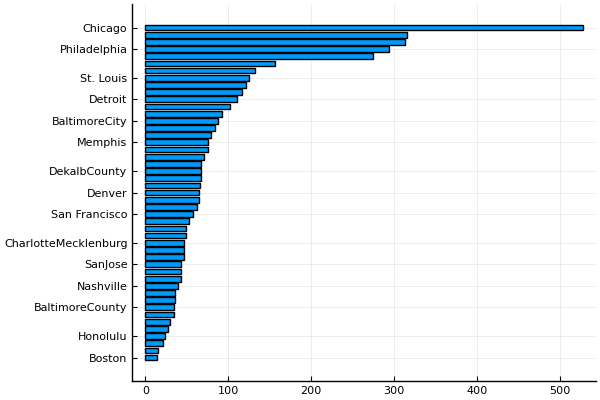

In [860]:
shootings_by_city = sort(by(df, :City, N_reports = :City => length), :N_reports)

bar(shootings_by_city[:, 1], shootings_by_city[:, 2], orientation = :horizontal, legend=false)

In [861]:
shootings_by_city[47, :]

528/4400

0.12

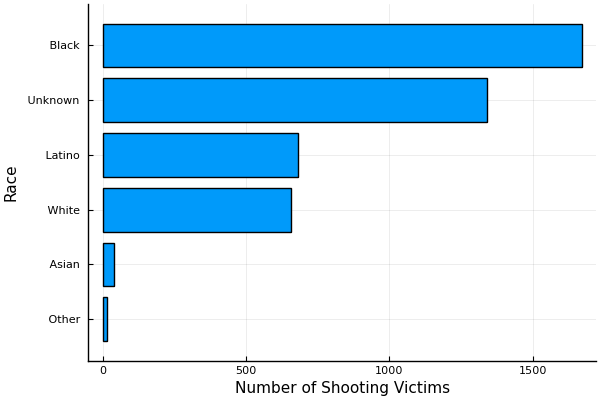

In [862]:
race[2:7, 1]

a = [" Other ", " Asian ", " White ", " Latino ", " Unknown ", " Black "]
bar(a, race[2:7, 2], orientation = :horizontal, legend=false, xlabel = "Number of Shooting Victims", ylabel = "Race")

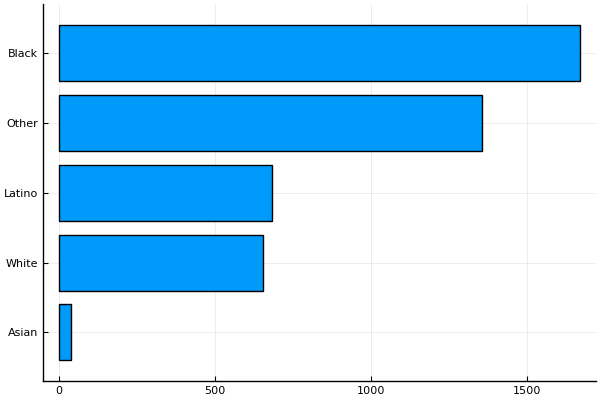

In [863]:
race = sort(by(df, :SubjectRace, N_reports = :SubjectRace => length), :N_reports)
bar(race[:, 1], race[:, 2], orientation = :horizontal, legend=false)

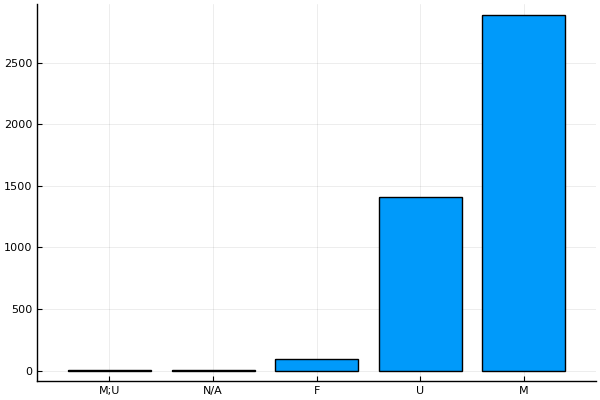

In [866]:
gender = sort(by(df, :SubjectGender, N_reports = :SubjectGender => length), :N_reports)
bar(gender[:, 1], gender[:, 2], orientation = :vertical, legend=false)

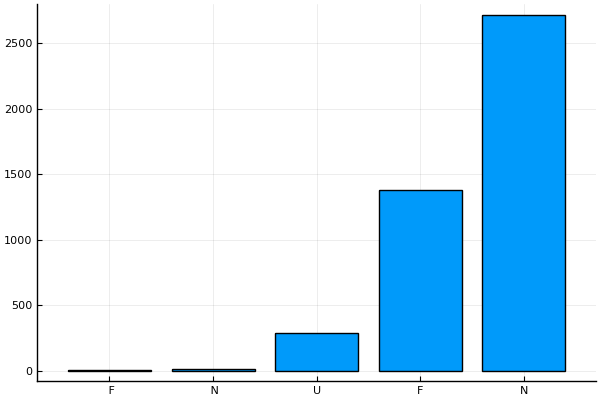

In [867]:
fatal = sort(by(df, :Fatal, N_reports = :Fatal => length), :N_reports)
bar(fatal[:, 1], fatal[:, 2], orientation = :vertical, legend=false)

In [868]:
fatal[2, :]

(2719+11)/4400

0.6204545454545455

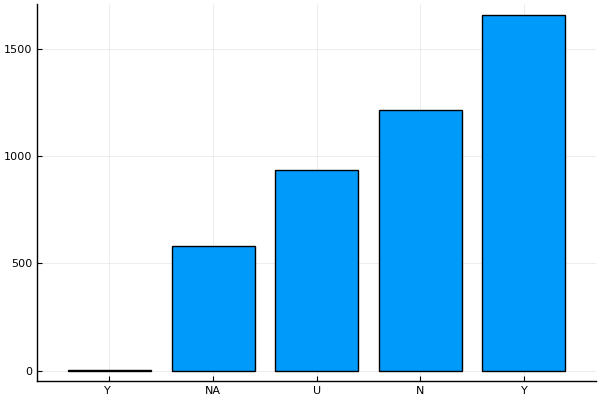

In [869]:
armed = sort(by(df, :SubjectArmed, N_reports = :SubjectArmed => length), :N_reports)
bar(armed[:, 1], armed[:, 2], orientation = :vertical, legend=false)

In [870]:
armed[5, :]

(3+1661)/4400

0.3781818181818182

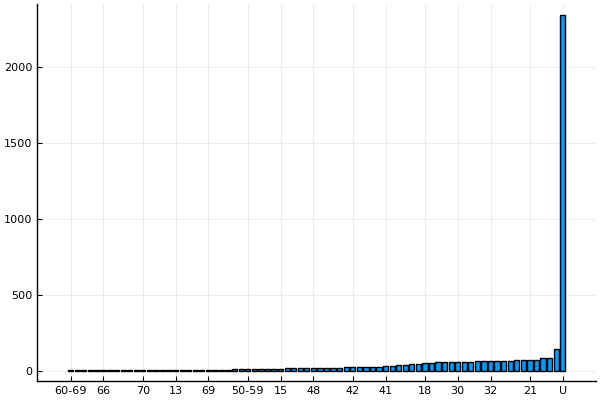

In [871]:
age = sort(by(df, :SubjectAge, N_reports = :SubjectAge => length), :N_reports)
bar(age[:, 1], age[:, 2], orientation = :vertical, legend=false, bins= 6)

In [1344]:
sum12

,Date1,N_reports
,String⍰,Int64
1,2010/01,9
2,2010/02,4
3,2010/03,13
4,2010/04,12
5,2010/05,4
6,2010/06,5
7,2010/07,6
8,2010/08,10
9,2010/09,7


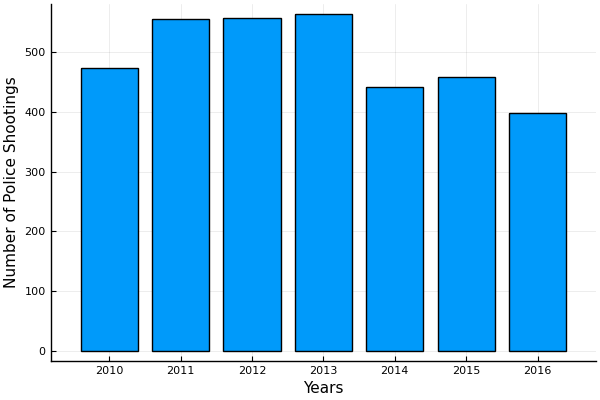

In [1368]:
df[:Year] = sort!(df[:Year])

sum12 = sort(by(df, :Year, N_reports = :Year => length), :N_reports)

sum12 =sort!(sum12)

bar(sum12[1:7,1], sum12[1:7,2], seriestype = :scatter, xlabel = "Years", ylabel = "Number of Police Shootings", legend = false)



## Analysis:

## Dividing data into test and training set

In [567]:
using LowRankModels;

In [568]:
include("proxgrad.jl");

In [1284]:
# description of the dataset
for i in 1:size(df,2)
    println(string(names(df)[i], "\t\t", typeof(df[4,i]), "\t\t\t", df[4,i]))  
end

Date		String			02/07/2012
NumberOfSubjects		Int64			1
Fatal		String			N
SubjectArmed		String			N
SubjectRace		String			Black
SubjectGender		String			M
SubjectAge		String			20
NatureOfStop		String			NA
NumberOfShots		String			NA
NumberOfOfficers		String			1
OfficerRace		String			U
OfficerGender		String			M
Department		String			New Orleans Police Department
FullNarrative		String			Non-fatal 2-7-12 B-10711-12. Officer shot citizen. Officer not charged. Citizen pointed weapon. PO Brian Pollard. Suspect Darius Williams BM 20 years old
City		String			NewOrleans
Notes		String			weapon
Month		String			02
Year		String			2012
Date1		String			2012/02
formattedSubjectAge		String			20
Fatal1		Float64			-1.0


In [1301]:
df = df[shuffle(1:end), :] # we shuffle the data so that our train/test split will be truly random

train_proportion = 0.8
n = size(df, 1)
println("Size of dataset: ", string(n))

# Put the first ntrain observations in the DataFrame df into the training set, and the rest into the test set
ntrain = convert(Int, round(train_proportion*n))

target = df[:, :Fatal1]

#Now you will split the data to create training and test sets. 

# the following variable records the features of examples in the training set
train_x = df[1:ntrain, :]
# the following variable records the features of examples in the test set
test_x = df[ntrain:n, :]
# the following variable records the labels of examples in the training set
train_y = target[1:ntrain, :]
# the following variable records the labels of examples in the test set
test_y = target[ntrain:n, :]

# let's take a look
train_y

Size of dataset: 4400


3520×1 Array{Float64,2}:
 -1.0
  1.0
  1.0
 -1.0
 -1.0
  1.0
 -1.0
  1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
  ⋮
  1.0
  1.0
  1.0
 -1.0
 -1.0
  1.0
 -1.0
  1.0
 -1.0
  1.0
 -1.0
 -1.0

## 1. Perceptron:

In [1302]:
train_x.Fatal1

3520-element Array{Float64,1}:
 -1.0
  1.0
  1.0
 -1.0
 -1.0
  1.0
 -1.0
  1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
  ⋮
  1.0
  1.0
  1.0
 -1.0
 -1.0
  1.0
 -1.0
  1.0
 -1.0
  1.0
 -1.0
 -1.0

In [1303]:
q2 = [1]
SA = "25"
SA1 = "Black"

for i in 1:3520
    if length(train_x.SubjectAge[i]) <= 2
        if isequal(train_x.SubjectAge[i], "NA") == false 
            if isequal(train_x.SubjectAge[i], "U") == false
                SA = vcat(SA, train_x.SubjectAge[i])
                SA1 = vcat(SA1, train_x.SubjectRace[i])
                q2 = vcat(q2, train_x.Fatal1[i])
            end
        end
    end
    
end

SA1

1638-element Array{String,1}:
 "Black"
 "Latino"
 "Black"
 "White"
 "Latino"
 "Latino"
 "Black"
 "Asian"
 "Black"
 "Black"
 "Black"
 "White"
 "Other"
 ⋮
 "Black"
 "White"
 "Black"
 "Black"
 "Black"
 "Black"
 "White"
 "Latino"
 "White"
 "Black"
 "Latino"
 "Black"

In [1304]:
a1 = []

for i in 1:length(SA)
    a1 = vcat(a1, parse(Int64, SA[i]))
end

### Race vs. Age:

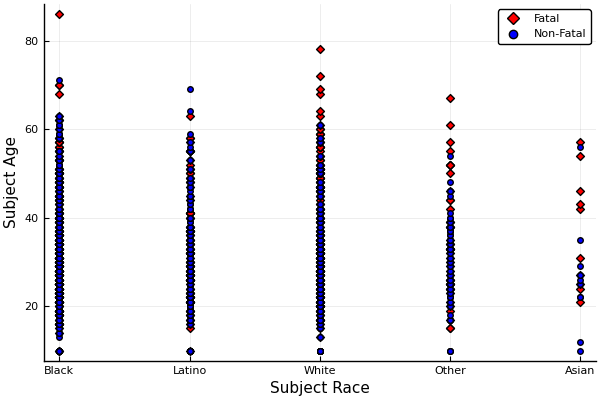

In [1338]:
Plots.plot(SA1[q2.==1], sort(a1[q2.==1]), color=:red, shape=:diamond, seriestype = :scatter, label="Fatal")
Plots.plot!(SA1[q2.==-1], sort(a1[q2.==-1]), color=:blue, seriestype = :scatter, label="Non-Fatal", xlabel = "Subject Race", ylabel = "Subject Age")



In [1306]:
train_x.NumberOfShots

3520-element Array{Union{Missing, String},1}:
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "21"
 "10"
 "3"
 "NA"
 "2"
 "NA"
 "NA"
 ⋮
 "NA"
 "11"
 "5"
 "4"
 "NA"
 "NA"
 "NA"
 "NA"
 "3"
 "NA"
 "NA"
 "3"

In [1307]:
NS = "5"
NS1 = "Black"
q1 = [1]

for i in 1:3520
    if length(train_x.NumberOfShots[i]) <= 2
        if isequal(train_x.NumberOfShots[i], "NA") == false
            NS = vcat(NS, train_x.NumberOfShots[i])
            NS1 = vcat(NS1, train_x.SubjectRace[i])
            q1 = vcat(q1, train_x.Fatal1[i])
        end
    end
end

q1

887-element Array{Float64,1}:
  1.0
 -1.0
  1.0
 -1.0
 -1.0
 -1.0
  1.0
  1.0
  1.0
 -1.0
 -1.0
  1.0
 -1.0
  ⋮
  1.0
 -1.0
  1.0
 -1.0
 -1.0
  1.0
  1.0
  1.0
  1.0
 -1.0
 -1.0
 -1.0

In [1308]:
a = []

for i in 1:length(NS)
    a = vcat(a, parse(Int64, NS[i]))
end

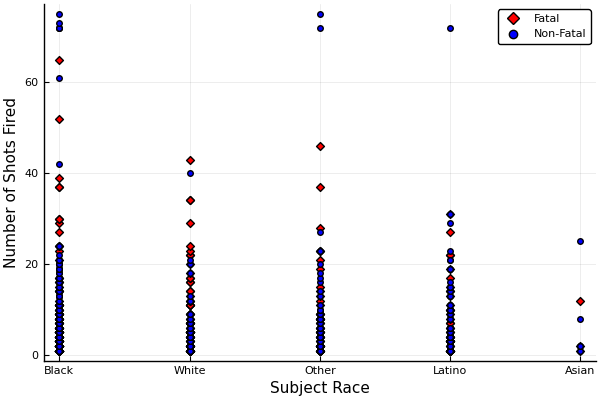

In [1337]:
Plots.plot(NS1[q1.==1], sort(a[q1.==1]), color=:red, shape=:diamond, seriestype = :scatter, label="Fatal")
Plots.plot!(NS1[q1.==-1], sort(a[q1.==-1]), color=:blue, seriestype = :scatter, label="Non-Fatal", xlabel = "Subject Race", ylabel = "Number of Shots Fired")


## 2. Polynomial:

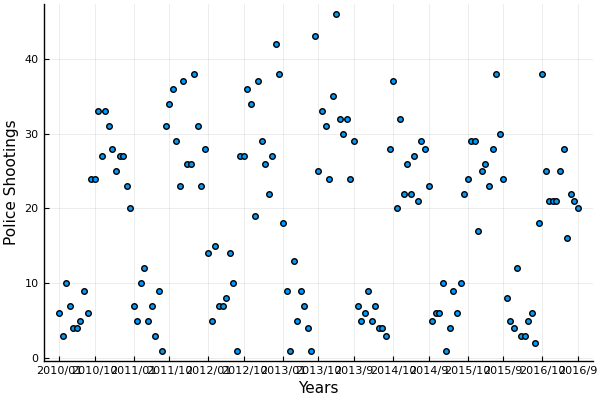

In [998]:
train_x[:Date1] = sort!(train_x[:Date1])

sum1 = sort(by(train_x, :Date1, N_reports = :Date1 => length), :N_reports)

sum1 =sort!(sum1)


Plots.plot(sum1[1:147,1], sum1[1:147,2], seriestype = :scatter, xlabel = "Years", ylabel = "Police Shootings", legend = false)



In [ ]:
x = Array{Float64}(undef, 147, 2)

for i = 1:147
    x[i] = i
end

y = sum1[1:147,2]
w = x[:,1]\y

#Your prediction vectors
l = x*w
l = l[:,1]

## 3. Loss Functions:

In [1310]:
n_train = size(train_x)[1]

3520

### Misclassification rate

In [ ]:
## Least squares

In [ ]:
## Least squares

In [ ]:
## Logistic loss, no reg.